In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-academic-performance-analysis-dataset/student_academic_performance.csv


# Preparations

In [2]:
df = pd.read_csv("/kaggle/input/student-academic-performance-analysis-dataset/student_academic_performance.csv")

In [3]:
df.head(5)

Student ID  Gender Race/Ethnicity Parental Education    Lunch Type  \
0           1  female        group B       some college      standard   
1           2    male        group D        high school      standard   
2           3    male        group B    bachelor degree  free/reduced   
3           4    male        group E        high school      standard   
4           5  female        group C    bachelor degree      standard   

   Test Preparation  Study Time per Week  Daily Sleep Duration  Math Score  \
0             False                 12.4                   5.4        62.0   
1             False                 18.3                   5.1        74.0   
2              True                 11.8                   7.8        71.0   
3             False                  NaN                   7.3        83.0   
4              True                 12.9                   6.3        41.0   

   Reading Score  Writing Score School Type Internet Access  
0           76.0           65.0      public            True  
1           73.0           76.0      public             NaN  
2           83.0           91.0      public           False  
3           73.0           52.0      public            True  
4            NaN           81.0      public            True

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Student ID            7000 non-null   int64  
 1   Gender                7000 non-null   object 
 2   Race/Ethnicity        7000 non-null   object 
 3   Parental Education    6300 non-null   object 
 4   Lunch Type            6790 non-null   object 
 5   Test Preparation      7000 non-null   bool   
 6   Study Time per Week   6370 non-null   float64
 7   Daily Sleep Duration  6440 non-null   float64
 8   Math Score            7000 non-null   float64
 9   Reading Score         6510 non-null   float64
 10  Writing Score         6650 non-null   float64
 11  School Type           7000 non-null   object 
 12  Internet Access       6720 non-null   object 
dtypes: bool(1), float64(5), int64(1), object(6)
memory usage: 663.2+ KB


From here, we can see that there are NAs in some columns. We need to do something to them before making analysis.

Let's do some more explorations first

In [5]:
df.describe().T

count         mean          std   min      25%     50%  \
Student ID            7000.0  3500.500000  2020.870275   1.0  1750.75  3500.5   
Study Time per Week   6370.0     9.662653     4.681971   0.0     6.40     9.6   
Daily Sleep Duration  6440.0     7.193587     1.316991   3.0     6.30     7.2   
Math Score            7000.0    69.476571    14.782909   3.0    59.00    70.0   
Reading Score         6510.0    71.134101    13.818268  21.0    62.00    71.0   
Writing Score         6650.0    70.460451    13.699283  14.0    61.00    71.0   

                          75%     max  
Student ID            5250.25  7000.0  
Study Time per Week     12.80    26.1  
Daily Sleep Duration     8.10    11.0  
Math Score              80.00   100.0  
Reading Score           81.00   100.0  
Writing Score           80.00   100.0

In [6]:
df['Parental Education'].value_counts()

Parental Education
high school         1845
some college        1498
bachelor degree     1262
associate degree    1101
master degree        594
Name: count, dtype: int64

In [7]:
# if you want to make it in percentage as well as counting the NA
df['Parental Education'].value_counts(dropna=False,normalize=True) * 100

Parental Education
high school         26.357143
some college        21.400000
bachelor degree     18.028571
associate degree    15.728571
NaN                 10.000000
master degree        8.485714
Name: proportion, dtype: float64

## Data Cleaning

This is the most important part before modelling:

🔹 Check & handle missing values

🔹 Check for duplicates

🔹 Formatting (data types)

In [8]:
# checking for missing values
df.isnull().sum()

Student ID                0
Gender                    0
Race/Ethnicity            0
Parental Education      700
Lunch Type              210
Test Preparation          0
Study Time per Week     630
Daily Sleep Duration    560
Math Score                0
Reading Score           490
Writing Score           350
School Type               0
Internet Access         280
dtype: int64

In [9]:
# percentage on NA data
(df.isnull().sum()/len(df)) * 100

Student ID               0.0
Gender                   0.0
Race/Ethnicity           0.0
Parental Education      10.0
Lunch Type               3.0
Test Preparation         0.0
Study Time per Week      9.0
Daily Sleep Duration     8.0
Math Score               0.0
Reading Score            7.0
Writing Score            5.0
School Type              0.0
Internet Access          4.0
dtype: float64

Parental Education have the most missing data, this is quite concerning, and need some handling

In [10]:
# divide numeric data and non-numeric
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns

In [11]:
numeric_cols

Index(['Student ID', 'Study Time per Week', 'Daily Sleep Duration',
       'Math Score', 'Reading Score', 'Writing Score'],
      dtype='object')

In [12]:
# input median to numerical columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# input "unknown" to Na in categorical columns
df[categorical_cols] = df[categorical_cols].fillna("Unknown")

In [13]:
df.isnull().sum()

Student ID              0
Gender                  0
Race/Ethnicity          0
Parental Education      0
Lunch Type              0
Test Preparation        0
Study Time per Week     0
Daily Sleep Duration    0
Math Score              0
Reading Score           0
Writing Score           0
School Type             0
Internet Access         0
dtype: int64

In [14]:
#check for duplicates
print(df.duplicated().sum())

0


In [15]:
#check for data types
df.dtypes

Student ID                int64
Gender                   object
Race/Ethnicity           object
Parental Education       object
Lunch Type               object
Test Preparation           bool
Study Time per Week     float64
Daily Sleep Duration    float64
Math Score              float64
Reading Score           float64
Writing Score           float64
School Type              object
Internet Access          object
dtype: object

In [16]:
#check for unique values
df.nunique()


Student ID              7000
Gender                     2
Race/Ethnicity             5
Parental Education         6
Lunch Type                 3
Test Preparation           2
Study Time per Week      238
Daily Sleep Duration      81
Math Score                84
Reading Score             79
Writing Score             79
School Type                3
Internet Access            3
dtype: int64

## Exploratory Data Analysis

The objective is to understand data patterns

- Data distribution

- Features Corelation

- Outlier

- Correlation between features and targets

In [17]:
#Quick EDA using ydata_profiling
from ydata_profiling import ProfileReport
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 13/13 [00:00<00:00, 132.33it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Manual EDA

In [18]:
# Basic statistic analysis in scores
df[['Math Score', 'Reading Score', 'Writing Score']].describe().T

count       mean        std   min   25%   50%   75%    max
Math Score     7000.0  69.476571  14.782909   3.0  59.0  70.0  80.0  100.0
Reading Score  7000.0  71.124714  13.325827  21.0  63.0  71.0  80.0  100.0
Writing Score  7000.0  70.487429  13.352877  14.0  62.0  71.0  79.0  100.0

- Math has the lowest average score, meanwhile Reading has he highest average score
- Lowest score in math is 3.0, which is the lowest among all scores

In [19]:
# Correlation between scores
df[['Math Score', 'Reading Score', 'Writing Score']].corr()

Math Score  Reading Score  Writing Score
Math Score       1.000000        0.00515      -0.006436
Reading Score    0.005150        1.00000       0.010220
Writing Score   -0.006436        0.01022       1.000000

In [20]:
# Scores comparisons between Gender
df.groupby('Gender')[['Math Score', 'Reading Score', 'Writing Score']].mean()

Math Score  Reading Score  Writing Score
Gender                                          
female   69.448432      70.838372       70.40746
male     69.505345      71.417509       70.56920

Males has slightly higher average on all scores

In [21]:
numeric_df = df.select_dtypes(include=['number'])

In [22]:
# all numeric corr
corr_matrix = numeric_df.corr()
corr_matrix

Student ID  Study Time per Week  Daily Sleep Duration  \
Student ID              1.000000            -0.001290             -0.001872   
Study Time per Week    -0.001290             1.000000             -0.011361   
Daily Sleep Duration   -0.001872            -0.011361              1.000000   
Math Score             -0.003274             0.005293             -0.013840   
Reading Score           0.013753            -0.005944              0.003328   
Writing Score           0.008487            -0.019033             -0.007905   

                      Math Score  Reading Score  Writing Score  
Student ID             -0.003274       0.013753       0.008487  
Study Time per Week     0.005293      -0.005944      -0.019033  
Daily Sleep Duration   -0.013840       0.003328      -0.007905  
Math Score              1.000000       0.005150      -0.006436  
Reading Score           0.005150       1.000000       0.010220  
Writing Score          -0.006436       0.010220       1.000000

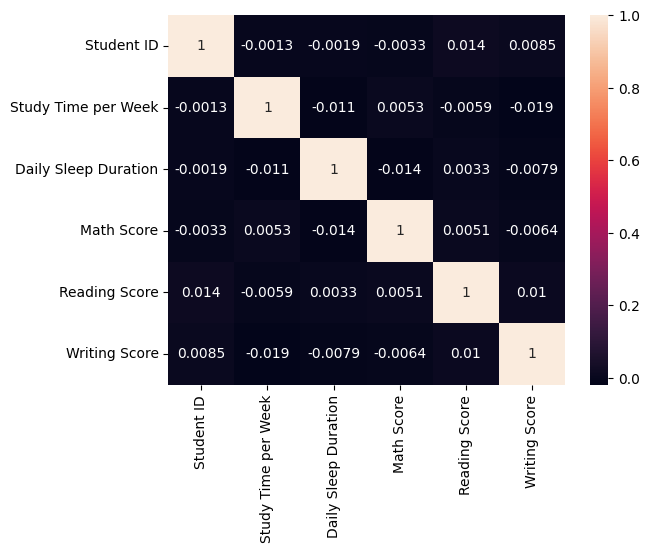

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.heatmap(corr_matrix, annot=True)
plt.show()

All correlations are low, indicates that the data might be random/synthetic

In [24]:
# Double check whether test preparation give significant increasement or not
df.groupby('Test Preparation')[['Math Score', 'Reading Score', 'Writing Score']].mean()

Math Score  Reading Score  Writing Score
Test Preparation                                          
False              69.586399      70.769602      70.543009
True               69.335077      71.582216      70.415822

No significant score from the preparation

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

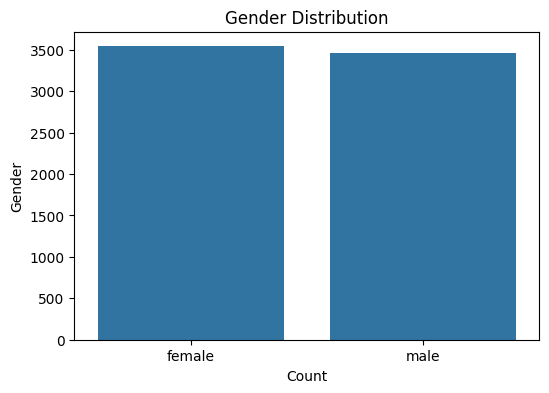

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender')
plt.title("Gender Distribution")
plt.xlabel("Count")
plt.ylabel("Gender")
plt.show()

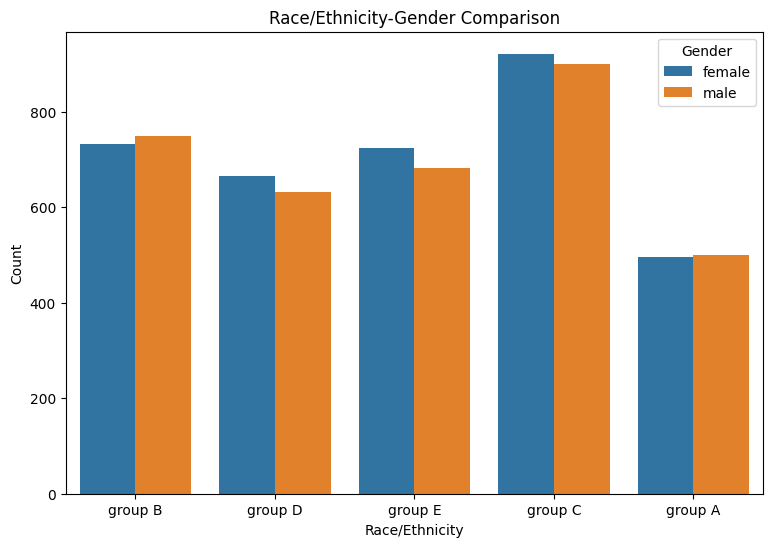

In [27]:
plt.figure(figsize=(9,6))
sns.countplot(data=df, x="Race/Ethnicity", hue="Gender")
plt.title("Race/Ethnicity-Gender Comparison")
plt.xlabel("Race/Ethnicity")
plt.ylabel("Count")
plt.show()

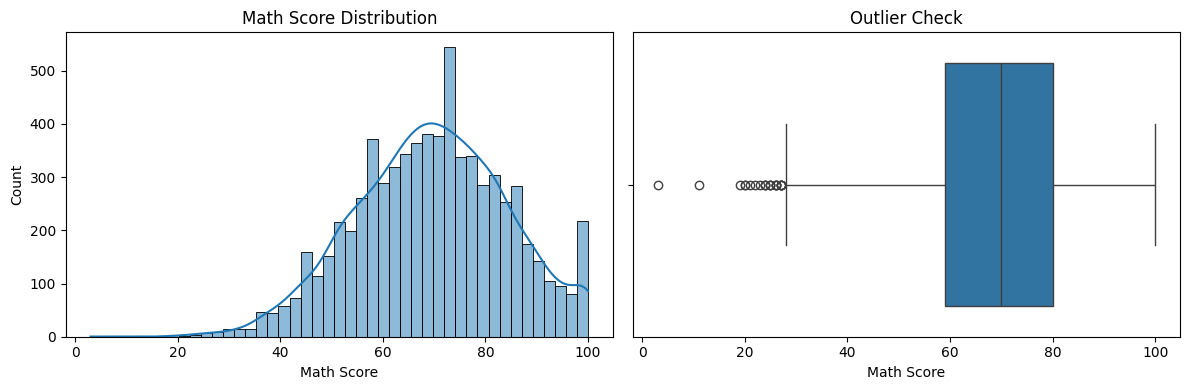

In [28]:
# Plotting Grades Distribution
fig, axes = plt.subplots(1, 2, figsize=(12,4))

#Histogram
sns.histplot(data=df, x="Math Score", kde=True, ax=axes[0])
axes[0].set_title("Math Score Distribution")

#Boxplot
sns.boxplot(data=df, x='Math Score', ax=axes[1])
axes[1].set_title("Outlier Check")

plt.tight_layout()
plt.show()

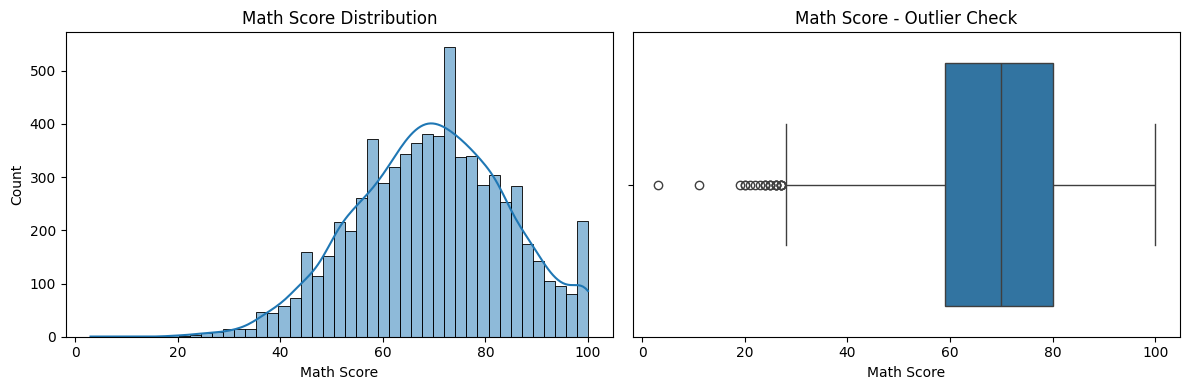

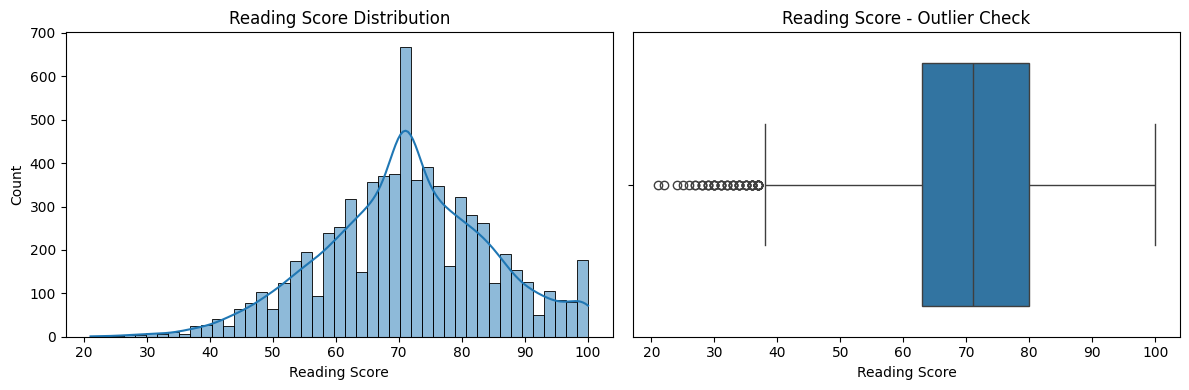

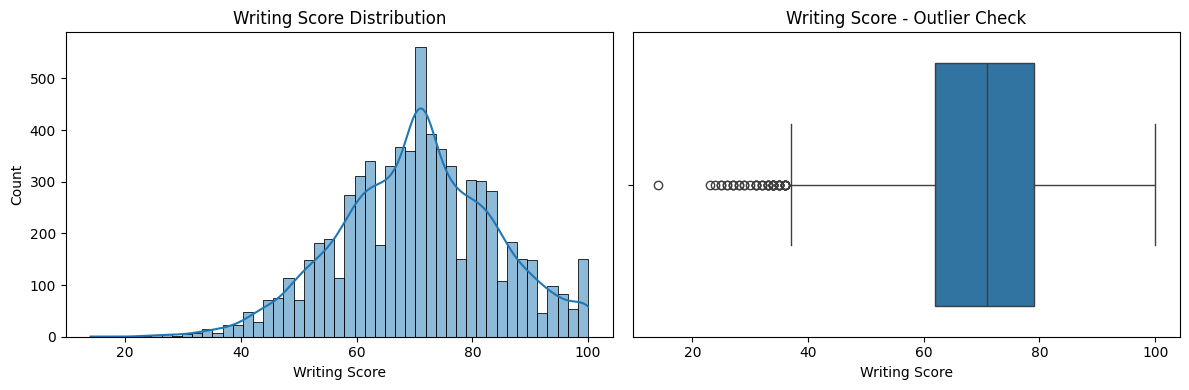

In [29]:
# Plotting multiple graphs
cols = ['Math Score', 'Reading Score', 'Writing Score']

for col in cols:
    fig, axes = plt.subplots(1,2, figsize=(12,4))

    # Histogram
    sns.histplot(data=df, x=col, kde=True, ax=axes[0])
    axes[0].set_title(f"{col} Distribution")

    # Boxplot
    sns.boxplot(data=df, x=col, ax=axes[1])
    axes[1].set_title(f"{col} - Outlier Check")

    plt.tight_layout()
    plt.show()

In [30]:
df.head(1)

Student ID  Gender Race/Ethnicity Parental Education Lunch Type  \
0           1  female        group B       some college   standard   

   Test Preparation  Study Time per Week  Daily Sleep Duration  Math Score  \
0             False                 12.4                   5.4        62.0   

   Reading Score  Writing Score School Type Internet Access  
0           76.0           65.0      public            True

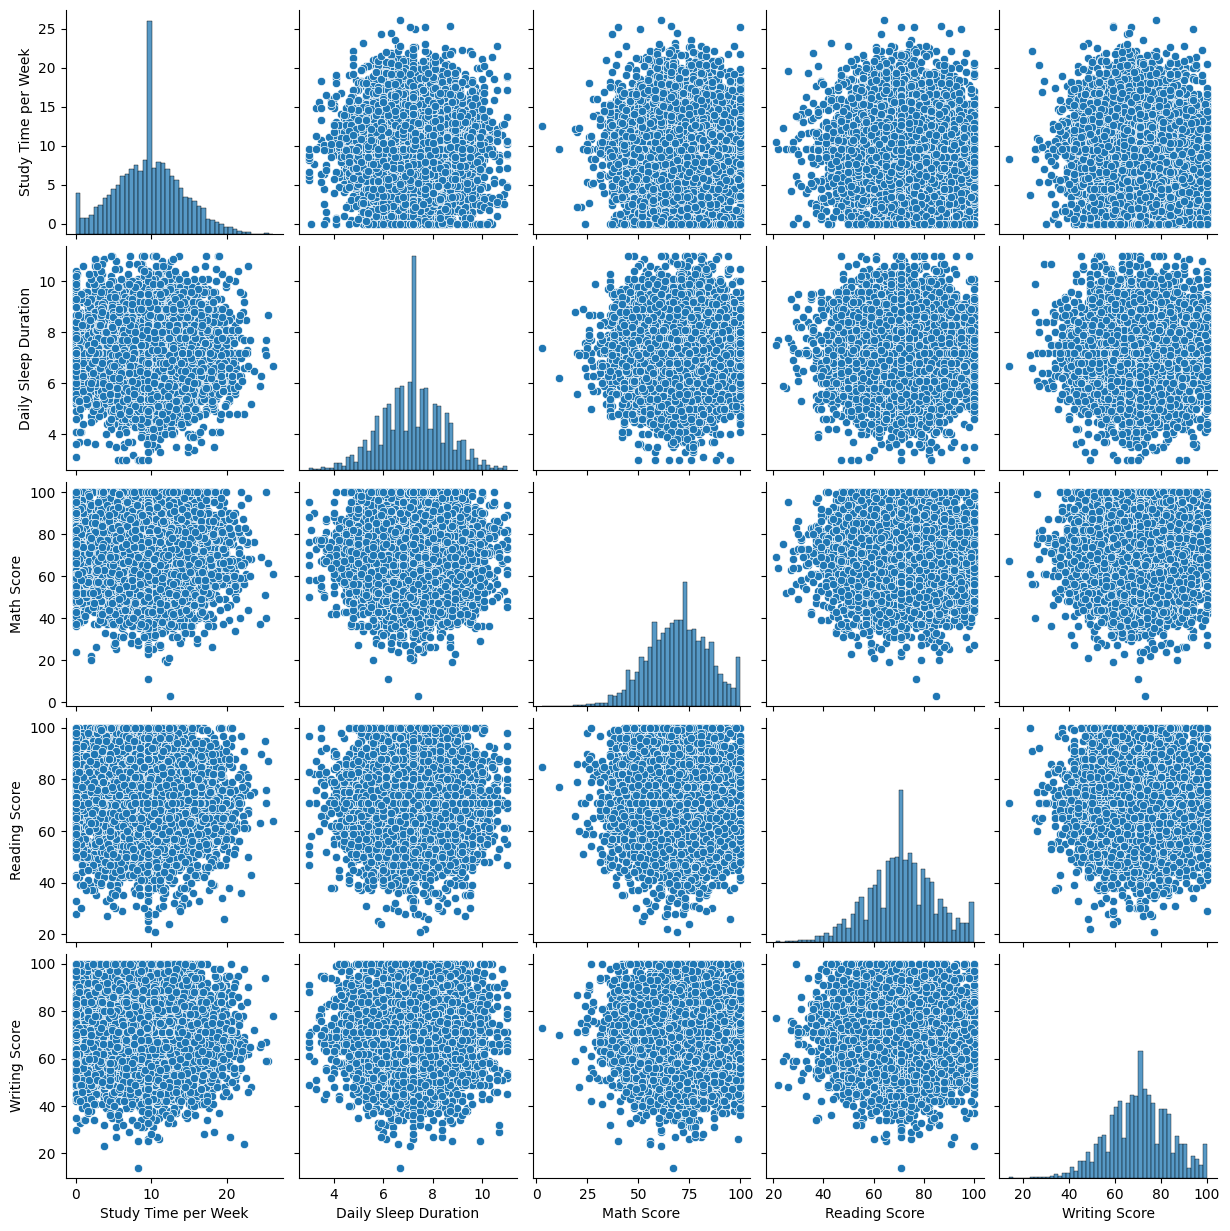

In [31]:
# Pair plot for Feature Relationships 
sns.pairplot(df[['Study Time per Week', 'Daily Sleep Duration','Math Score', 'Reading Score', 'Writing Score' ]])
plt.show()

# Model Build

Let's start with MATH

In [32]:
df.head(5)

Student ID  Gender Race/Ethnicity Parental Education    Lunch Type  \
0           1  female        group B       some college      standard   
1           2    male        group D        high school      standard   
2           3    male        group B    bachelor degree  free/reduced   
3           4    male        group E        high school      standard   
4           5  female        group C    bachelor degree      standard   

   Test Preparation  Study Time per Week  Daily Sleep Duration  Math Score  \
0             False                 12.4                   5.4        62.0   
1             False                 18.3                   5.1        74.0   
2              True                 11.8                   7.8        71.0   
3             False                  9.6                   7.3        83.0   
4              True                 12.9                   6.3        41.0   

   Reading Score  Writing Score School Type Internet Access  
0           76.0           65.0      public            True  
1           73.0           76.0      public         Unknown  
2           83.0           91.0      public           False  
3           73.0           52.0      public            True  
4           71.0           81.0      public            True

In [33]:
# separate between feature and target
y = df['Math Score']
X = df.drop(columns=['Math Score'])

In [34]:
y.head()

0    62.0
1    74.0
2    71.0
3    83.0
4    41.0
Name: Math Score, dtype: float64

In [35]:
X.head()

Student ID  Gender Race/Ethnicity Parental Education    Lunch Type  \
0           1  female        group B       some college      standard   
1           2    male        group D        high school      standard   
2           3    male        group B    bachelor degree  free/reduced   
3           4    male        group E        high school      standard   
4           5  female        group C    bachelor degree      standard   

   Test Preparation  Study Time per Week  Daily Sleep Duration  Reading Score  \
0             False                 12.4                   5.4           76.0   
1             False                 18.3                   5.1           73.0   
2              True                 11.8                   7.8           83.0   
3             False                  9.6                   7.3           73.0   
4              True                 12.9                   6.3           71.0   

   Writing Score School Type Internet Access  
0           65.0      public            True  
1           76.0      public         Unknown  
2           91.0      public           False  
3           52.0      public            True  
4           81.0      public            True

## Feature Engineering
- Encoding Categorical Data (Label / One-Hot)
  
- Scaling (Standard / MinMax)

- Creating New Features

- Dropping unrelevant Features

In [36]:
# Encoding Categorical Data
X = pd.get_dummies(X, drop_first=True) # drop_first to avoid multicollinearity
X.head()

Student ID  Test Preparation  Study Time per Week  Daily Sleep Duration  \
0           1             False                 12.4                   5.4   
1           2             False                 18.3                   5.1   
2           3              True                 11.8                   7.8   
3           4             False                  9.6                   7.3   
4           5              True                 12.9                   6.3   

   Reading Score  Writing Score  Gender_male  Race/Ethnicity_group B  \
0           76.0           65.0        False                    True   
1           73.0           76.0         True                   False   
2           83.0           91.0         True                    True   
3           73.0           52.0         True                   False   
4           71.0           81.0        False                   False   

   Race/Ethnicity_group C  Race/Ethnicity_group D  ...  \
0                   False                   False  ...   
1                   False                    True  ...   
2                   False                   False  ...   
3                   False                   False  ...   
4                    True                   False  ...   

   Parental Education_bachelor degree  Parental Education_high school  \
0                               False                           False   
1                               False                            True   
2                                True                           False   
3                               False                            True   
4                                True                           False   

   Parental Education_master degree  Parental Education_some college  \
0                             False                             True   
1                             False                            False   
2                             False                            False   
3                             False                            False   
4                             False                            False   

   Lunch Type_free/reduced  Lunch Type_standard  School Type_private  \
0                    False                 True                False   
1                    False                 True                False   
2                     True                False                False   
3                    False                 True                False   
4                    False                 True                False   

   School Type_public  Internet Access_True  Internet Access_Unknown  
0                True                  True                    False  
1                True                 False                     True  
2                True                 False                    False  
3                True                  True                    False  
4                True                  True                    False  

[5 rows x 22 columns]

## Split Data

Train-test Split

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training

In [38]:
# using simple model
# linear regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Model Eval

Evaluating model performance using test data

Use the suitable metrics for the problem:

- Accuracy

- Precision/Recall

- RMSE

etc.

In [39]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)

RMSE: 14.779342161132869
R2 Score: -0.006263292251369679


R2 (R squared) negative, means that the model performance is too bad. It's even better guessing the value using mean.

This also proves that the data is randomly generated. No correlation between predictors

## Model Improvements

Hyperparameter tuning

Cross-validation

Feature selection

Use other models

In [40]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("RF R2:", r2_score(y_test, y_pred_rf))

RF R2: -0.05657427838906259


Once again, even more complicated model cannot handle the prediction

In [41]:
# Try using average value to predict 
import numpy as np

baseline_pred = np.full_like(y_test, y_train.mean())
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_pred))
print("Baseline RMSE:", baseline_rmse)

Baseline RMSE: 14.744172806916096


It has the same RMSE, so The two models are not better than using average